In [ ]:
import os
Root = "/content/drive/MyDrive/Colab Notebooks/traffic images"
os.chdir(Root)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
!pip install tensorflow


In [ ]:
!pip install tensorflow==2.8.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 37.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: google-auth-oauthlib
    Found existing 

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.8.0


In [ ]:
!pip install keras

In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')

In [ ]:
data_dir = "/content/drive/MyDrive/Colab Notebooks/traffic images"
train_path = 'Train'
test_path = 'Test'

# Resizing the images to 30x30x3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

In [ ]:
NUM_CATEGORIES = len(os.listdir("/content/drive/MyDrive/Colab Notebooks/traffic images/Train"))
NUM_CATEGORIES

43

In [ ]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }

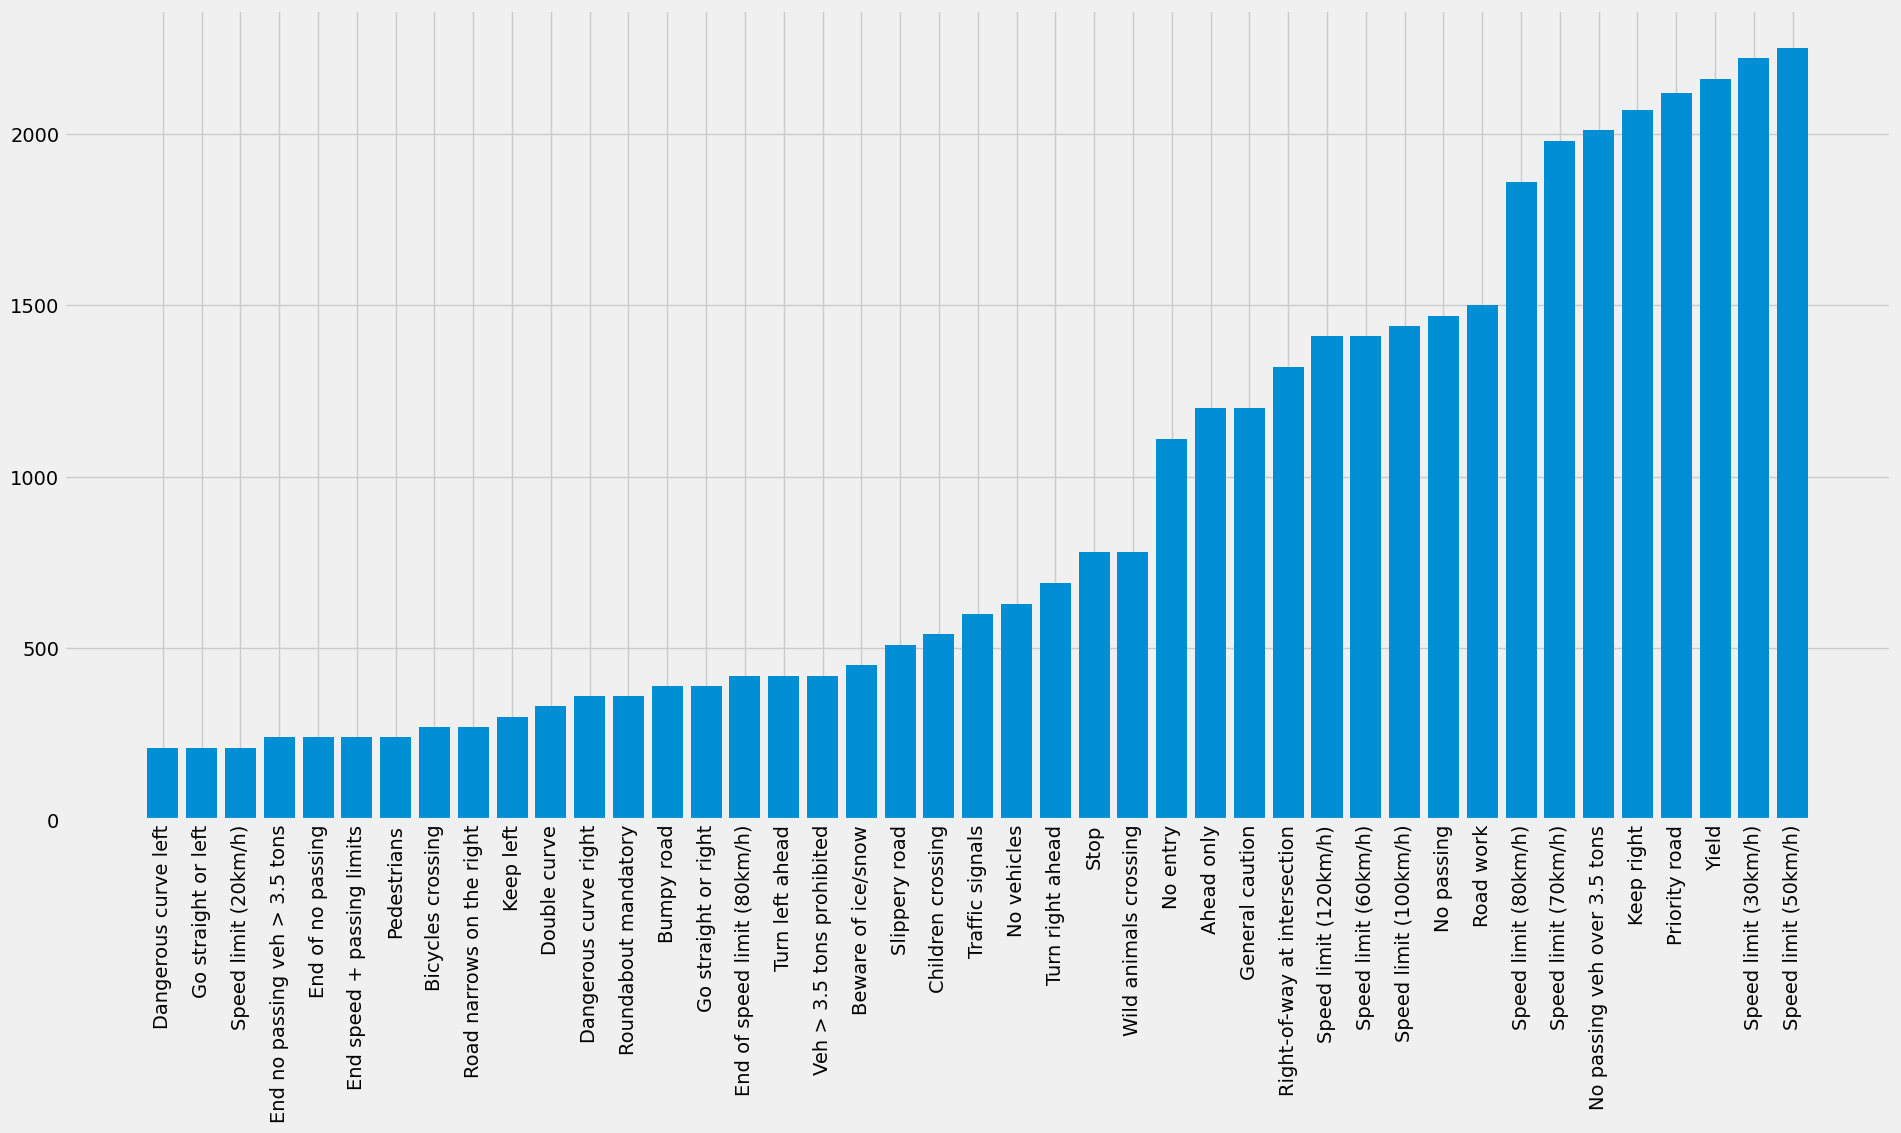

In [ ]:
folders = os.listdir("/content/drive/MyDrive/Colab Notebooks/traffic images/Train")

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir("/content/drive/MyDrive/Colab Notebooks/traffic images/Train" + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])

# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

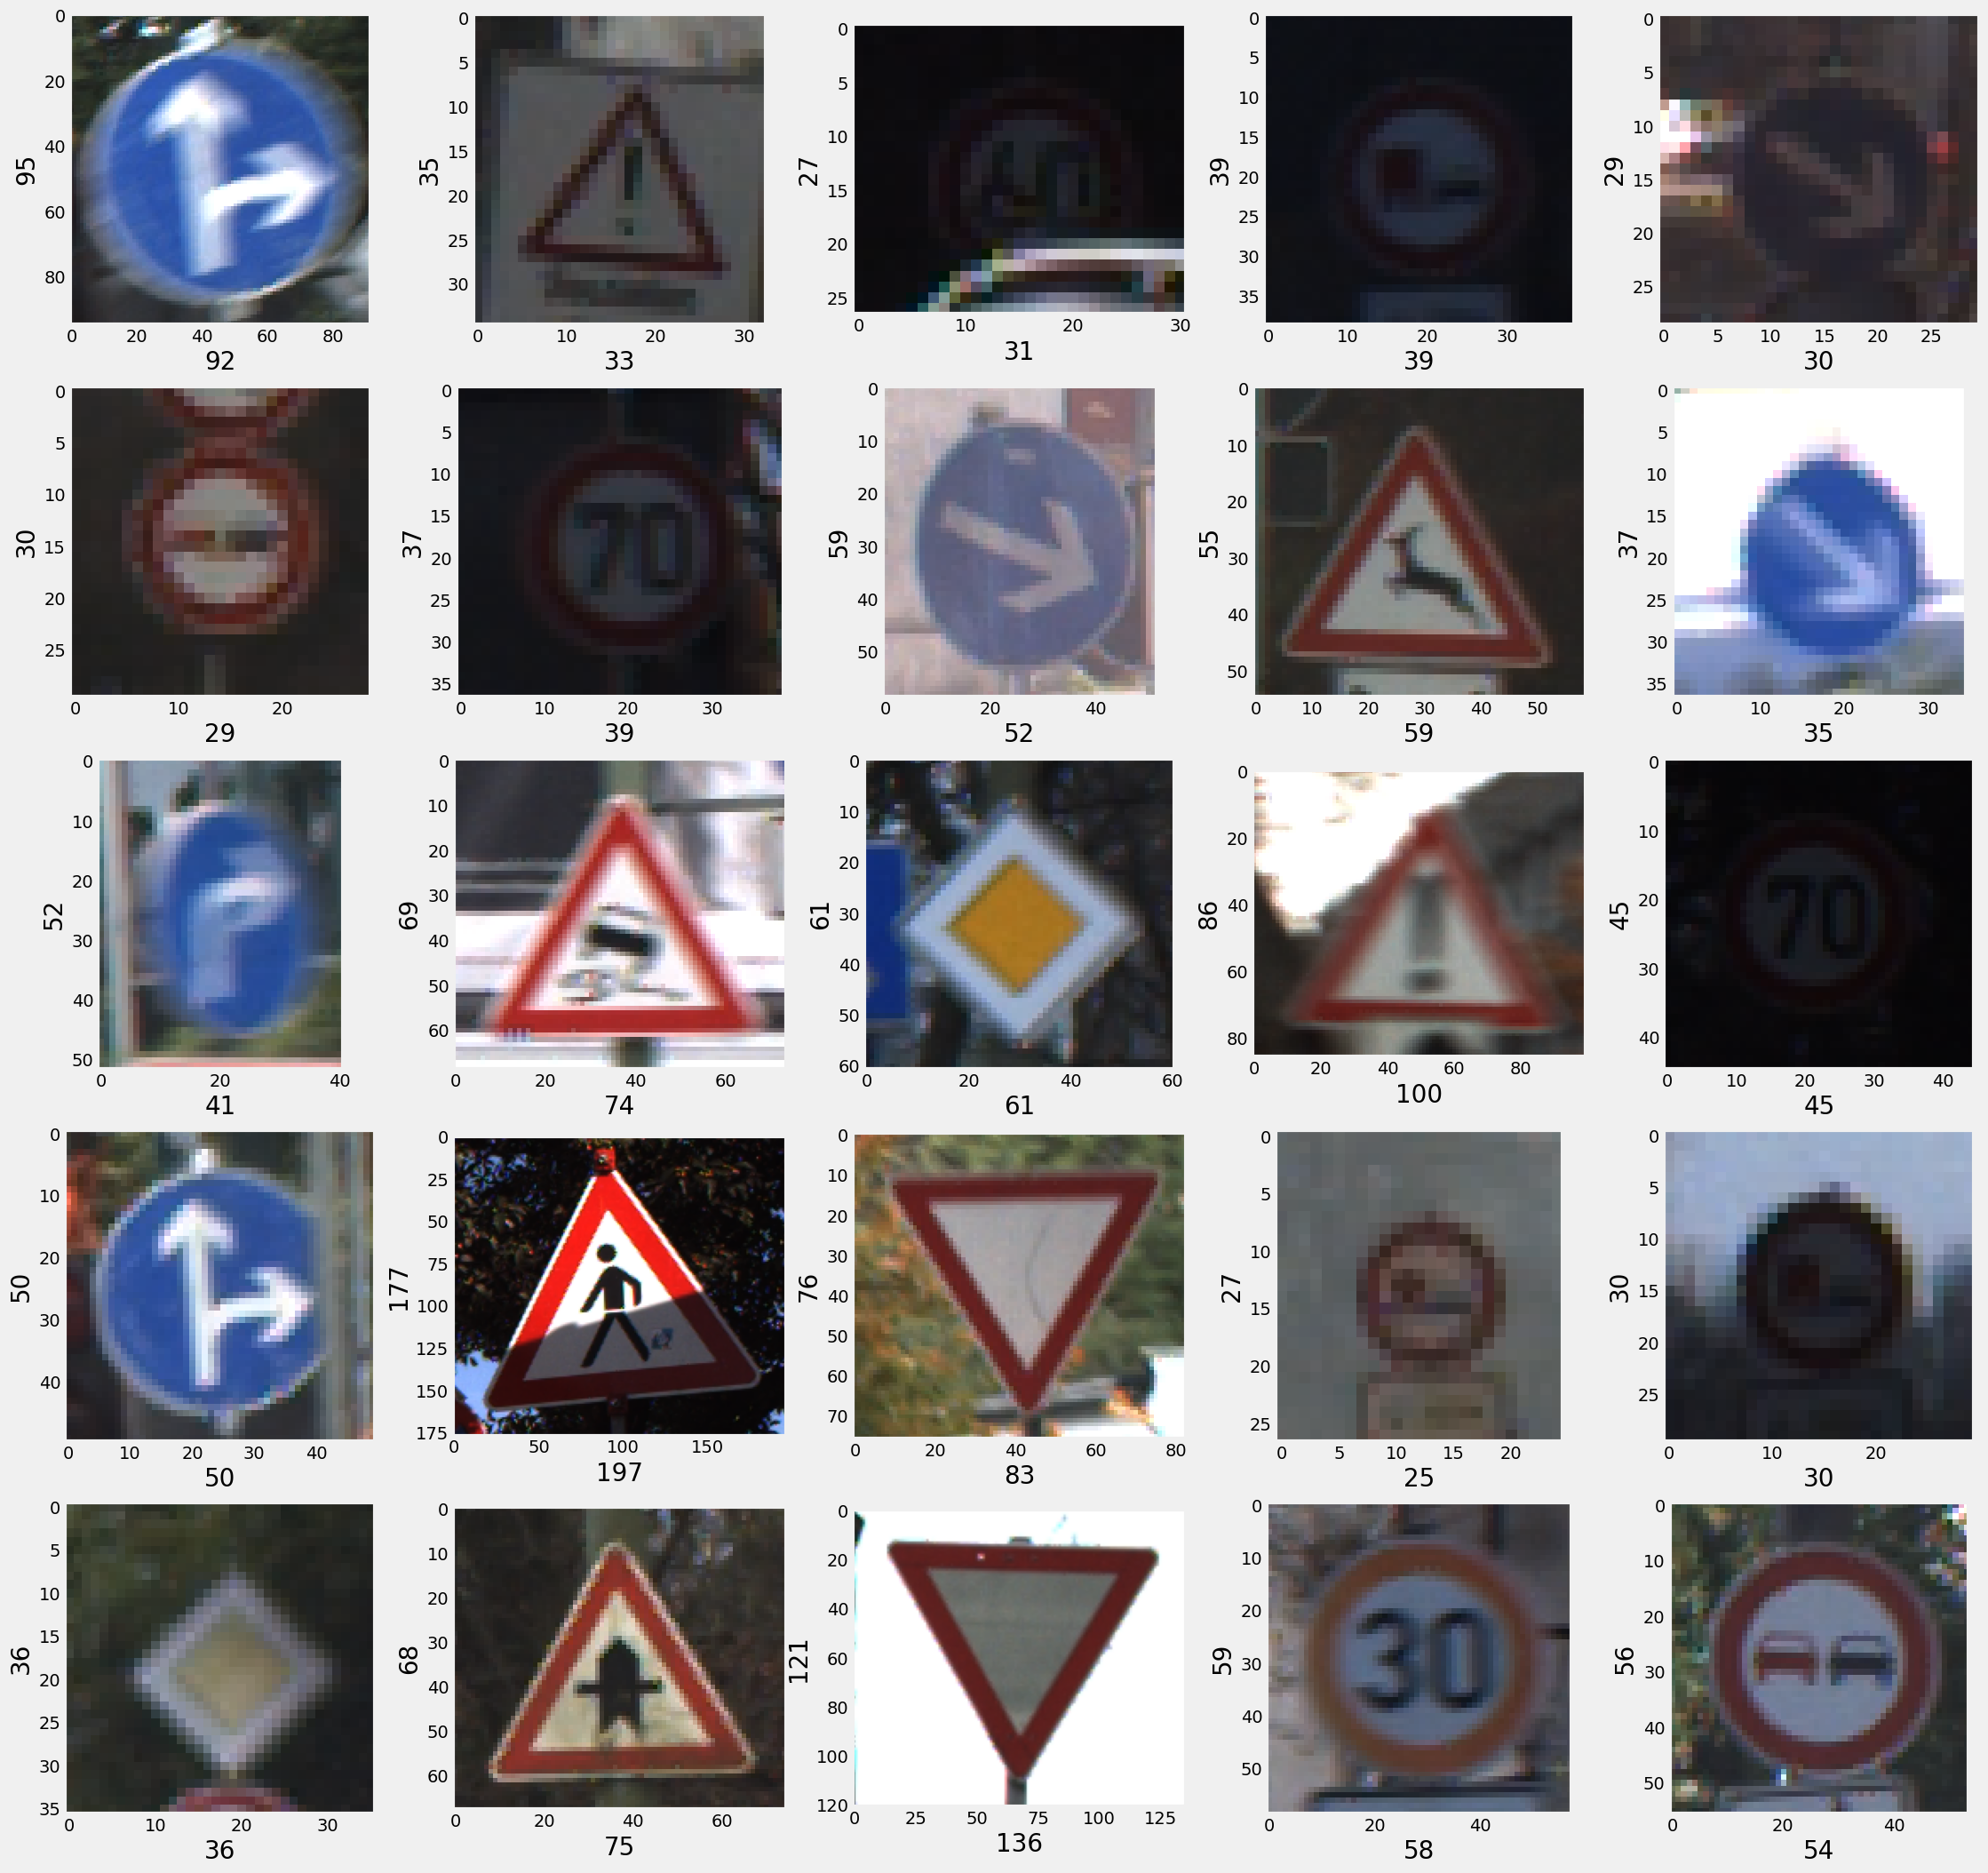

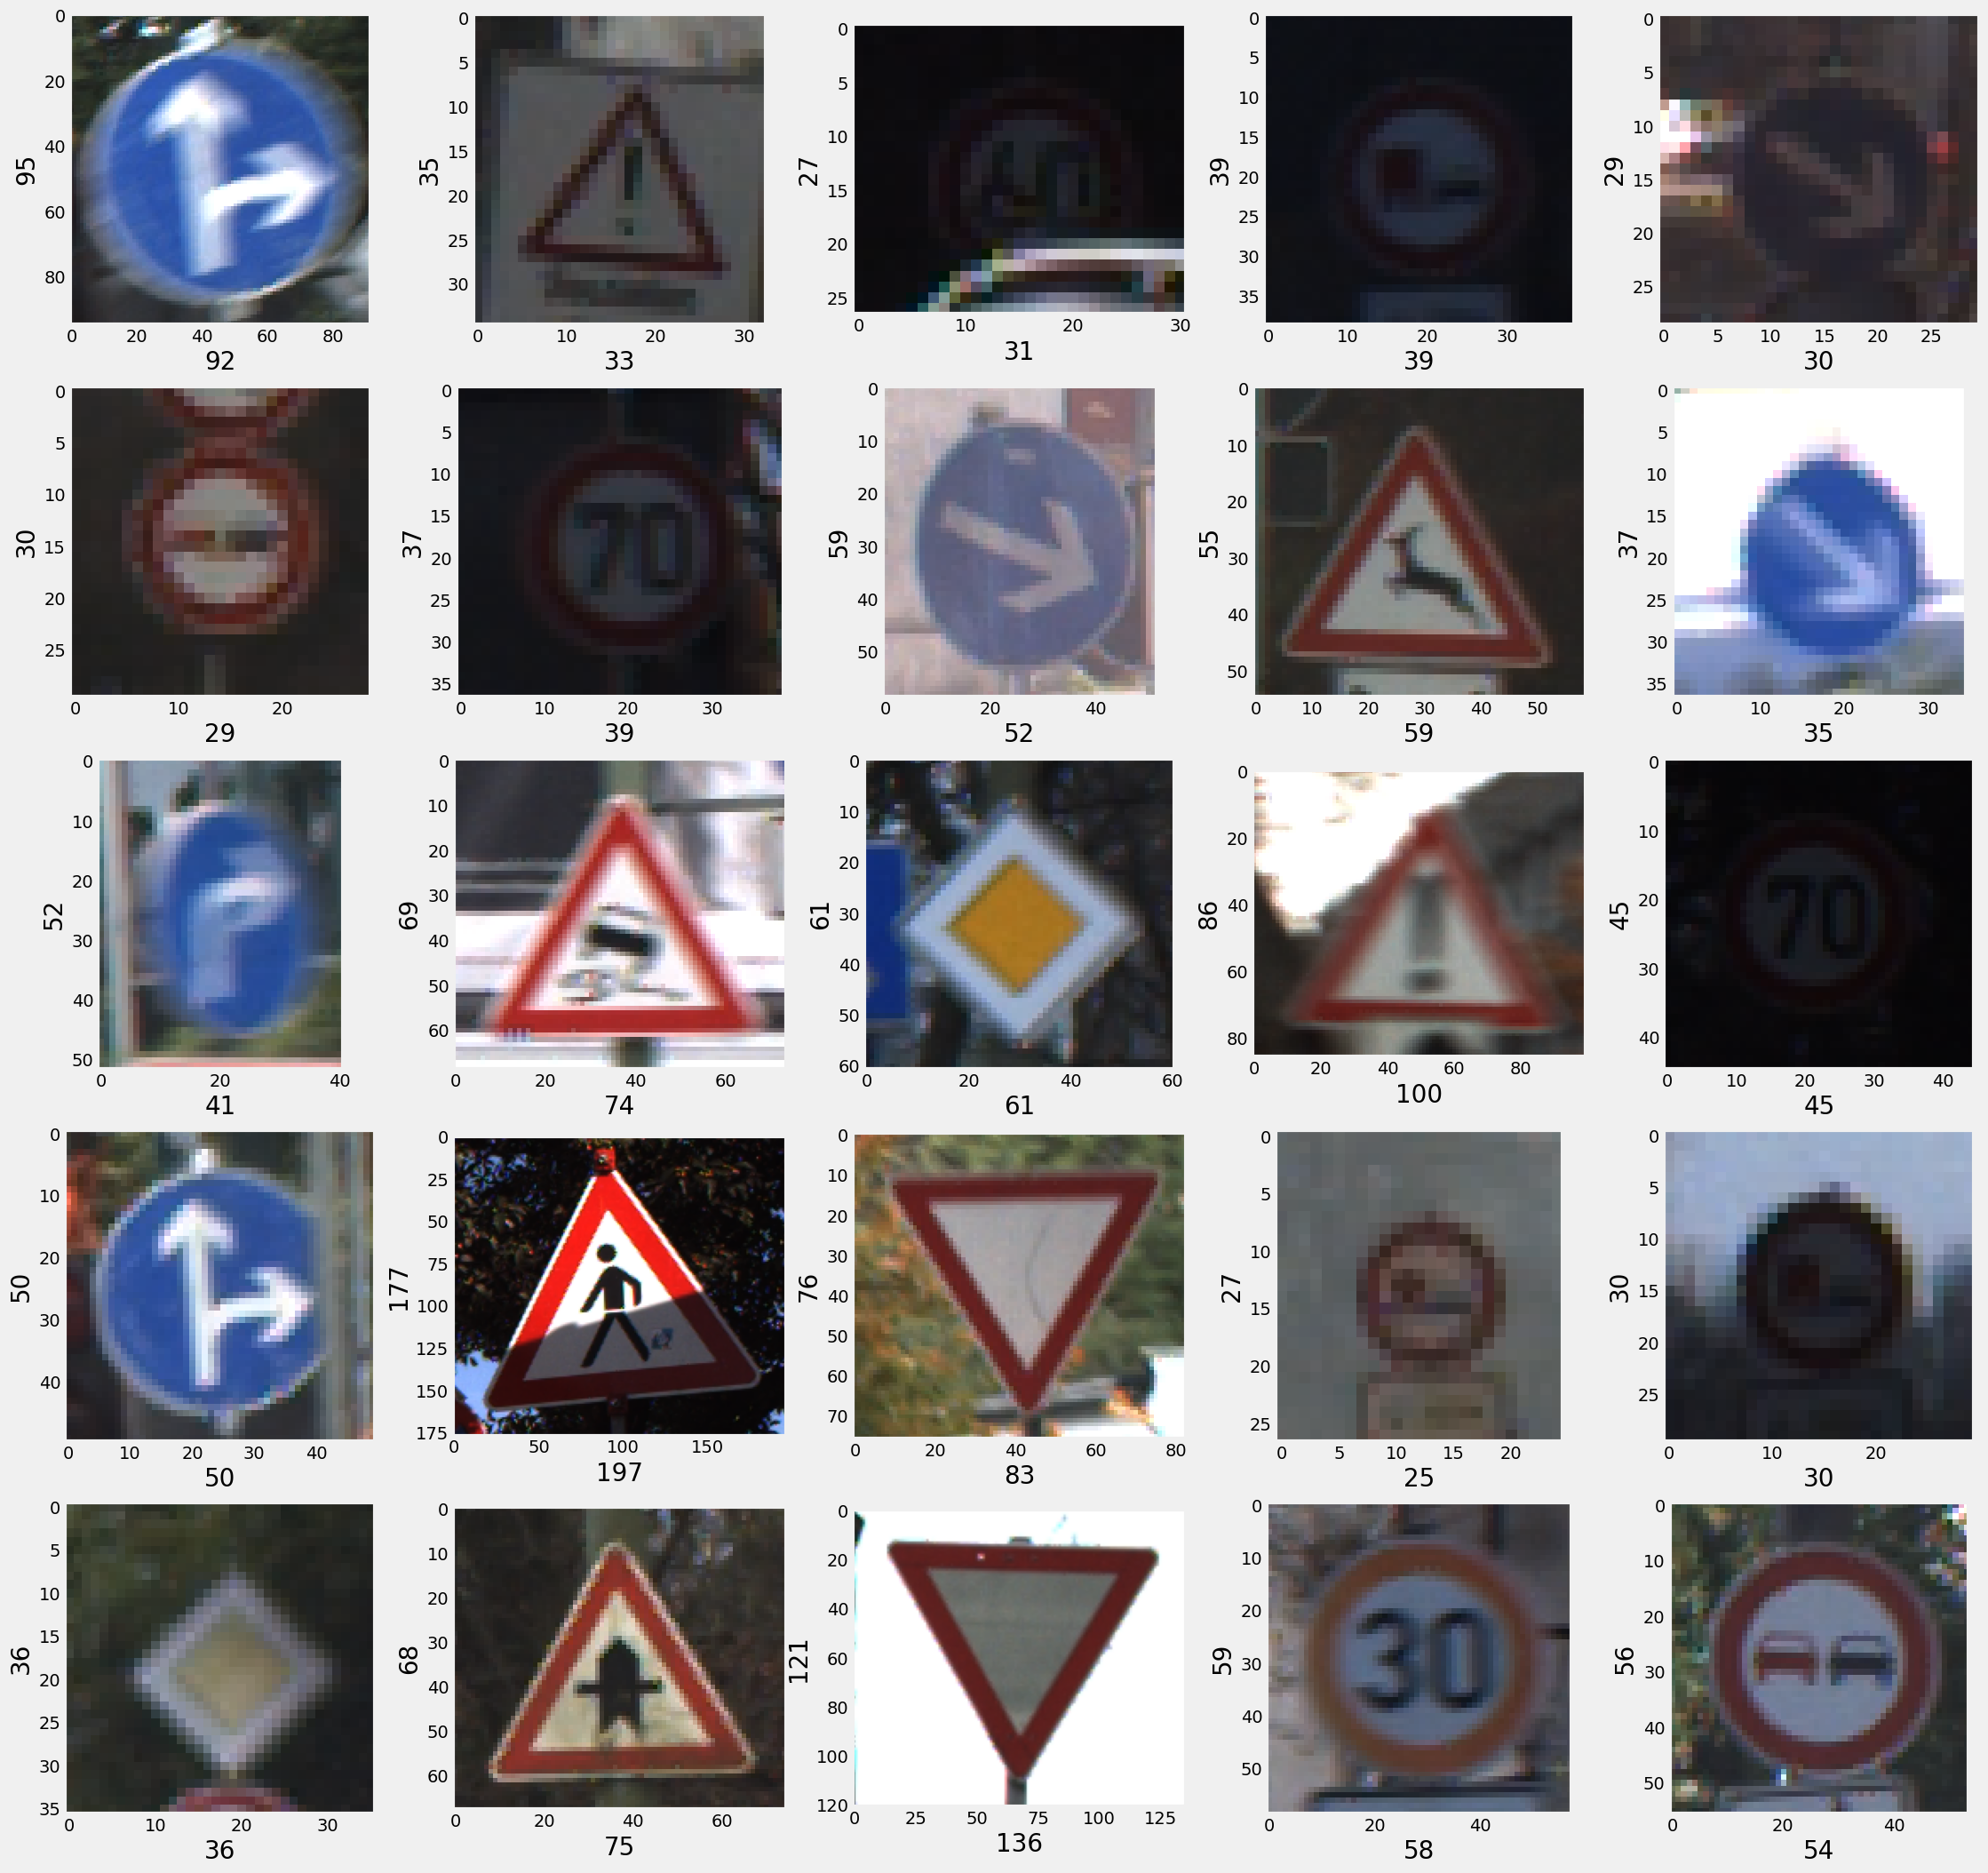

In [ ]:
import random
from matplotlib.image import imread
import matplotlib.pyplot as plt

data_dir = '/content/drive/MyDrive/Colab Notebooks/traffic images'

test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = data_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(False)  # Turn off grid lines
    plt.xlabel(str(rand_img.shape[1]), fontsize=20)  # width of image
    plt.ylabel(str(rand_img.shape[0]), fontsize=20)  # height of image

plt.show()


In [ ]:
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39229, 30, 30, 3) (39229,)


In [ ]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27460, 30, 30, 3)
X_valid.shape (11769, 30, 30, 3)
y_train.shape (27460,)
y_valid.shape (11769,)
X_train.shape (27460, 30, 30, 3)
X_valid.shape (11769, 30, 30, 3)
y_train.shape (27460,)
y_valid.shape (11769,)


In [ ]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(27460, 43)
(11769, 43)


In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),

    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),

    keras.layers.Dense(43, activation='softmax')
])

In [ ]:
lr = 0.001
epochs = 10

opt = Adam(learning_rate=lr)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


In [ ]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/10
859/859 [==============================] - 134s 151ms/step - loss: 1.1371 - accuracy: 0.6938 - val_loss: 0.3107 - val_accuracy: 0.8934
Epoch 2/10
859/859 [==============================] - 144s 168ms/step - loss: 0.2006 - accuracy: 0.9375 - val_loss: 0.0458 - val_accuracy: 0.9841
Epoch 3/10
859/859 [==============================] - 130s 151ms/step - loss: 0.1211 - accuracy: 0.9634 - val_loss: 0.0379 - val_accuracy: 0.9881
Epoch 4/10
859/859 [==============================] - 130s 151ms/step - loss: 0.0949 - accuracy: 0.9701 - val_loss: 0.0133 - val_accuracy: 0.9959
Epoch 5/10
859/859 [==============================] - 139s 162ms/step - loss: 0.0823 - accuracy: 0.9749 - val_loss: 0.0142 - val_accuracy: 0.9956
Epoch 6/10
859/859 [==============================] - 128s 149ms/step - loss: 0.0716 - accuracy: 0.9777 - val_loss: 0.0407 - val_accuracy: 0.9872
Epoch 7/10
859/859 [==============================] - 138s 161ms/step - loss: 0.0821 - accuracy: 0.9751 - val_loss: 0.0182 -

In [ ]:
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save_weights("/content/drive/MyDrive/Colab Notebooks/traffic images/output")

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator for augmentation
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest"
)

# Now you can safely call dir(aug)
print(dir(aug))


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_keras_api_names', '_keras_api_names_v1', '_validation_split', 'apply_transform', 'brightness_range', 'channel_axis', 'channel_shift_range', 'col_axis', 'cval', 'data_format', 'dtype', 'featurewise_center', 'featurewise_std_normalization', 'fill_mode', 'fit', 'flow', 'flow_from_dataframe', 'flow_from_directory', 'get_random_transform', 'height_shift_range', 'horizontal_flip', 'interpolation_order', 'mean', 'preprocessing_function', 'random_transform', 'rescale', 'rotation_range', 'row_axis', 'samplewise_center', 'samplewise_std_normalization', 'shear_range', 'standardize', 'std', 'vertical_flip', 'width_shift_range', 'zca_epsilon', 'zca_whitening

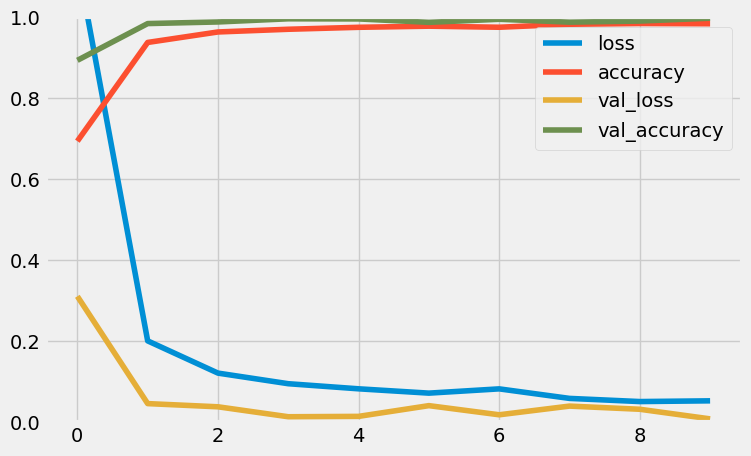

In [ ]:

# Plot training history
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [ ]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/traffic images'

test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255

# Get predicted probabilities for each class
pred_probs = model.predict(X_test)

# Get the predicted class index for each image
pred = np.argmax(pred_probs, axis=1)

# Print accuracy
print('Test Data accuracy: ', accuracy_score(labels, pred) * 100)


395/395 [==============================] - 11s 28ms/step
Test Data accuracy:  97.83056215360253


In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(labels, pred)

<Axes: >

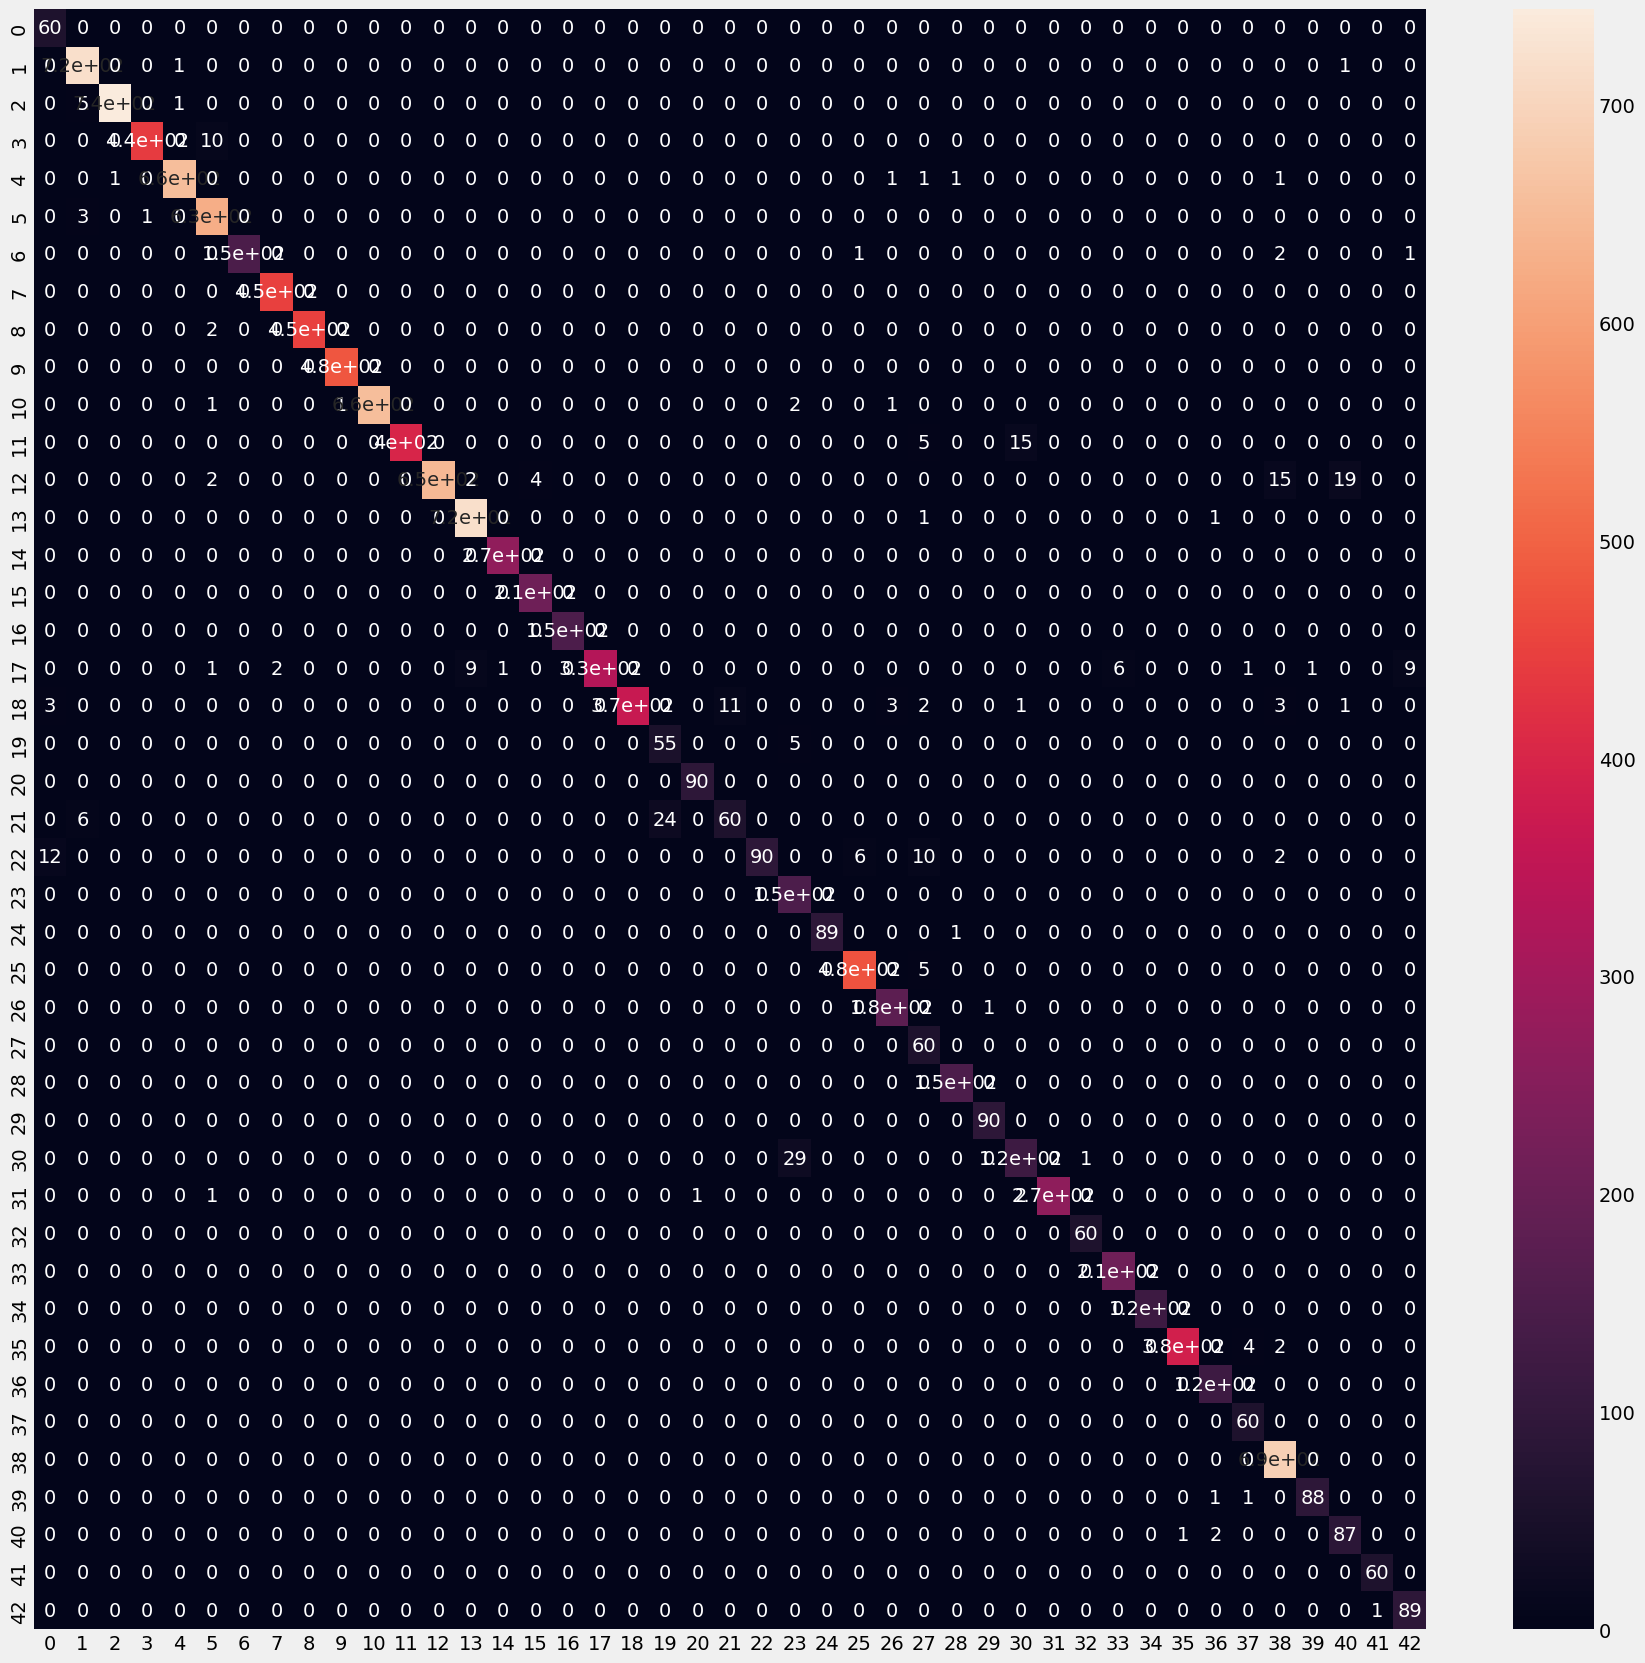

In [ ]:
import seaborn as sns
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(labels, pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        60
           1       0.98      1.00      0.99       720
           2       1.00      0.99      1.00       750
           3       1.00      0.98      0.99       450
           4       1.00      0.99      0.99       660
           5       0.97      0.99      0.98       630
           6       1.00      0.97      0.99       150
           7       1.00      1.00      1.00       450
           8       1.00      1.00      1.00       450
           9       1.00      1.00      1.00       480
          10       1.00      0.99      1.00       660
          11       1.00      0.95      0.98       420
          12       1.00      0.94      0.97       690
          13       0.98      1.00      0.99       720
          14       1.00      1.00      1.00       270
          15       0.98      1.00      0.99       210
          16       1.00      1.00      1.00       150
          17       1.00    

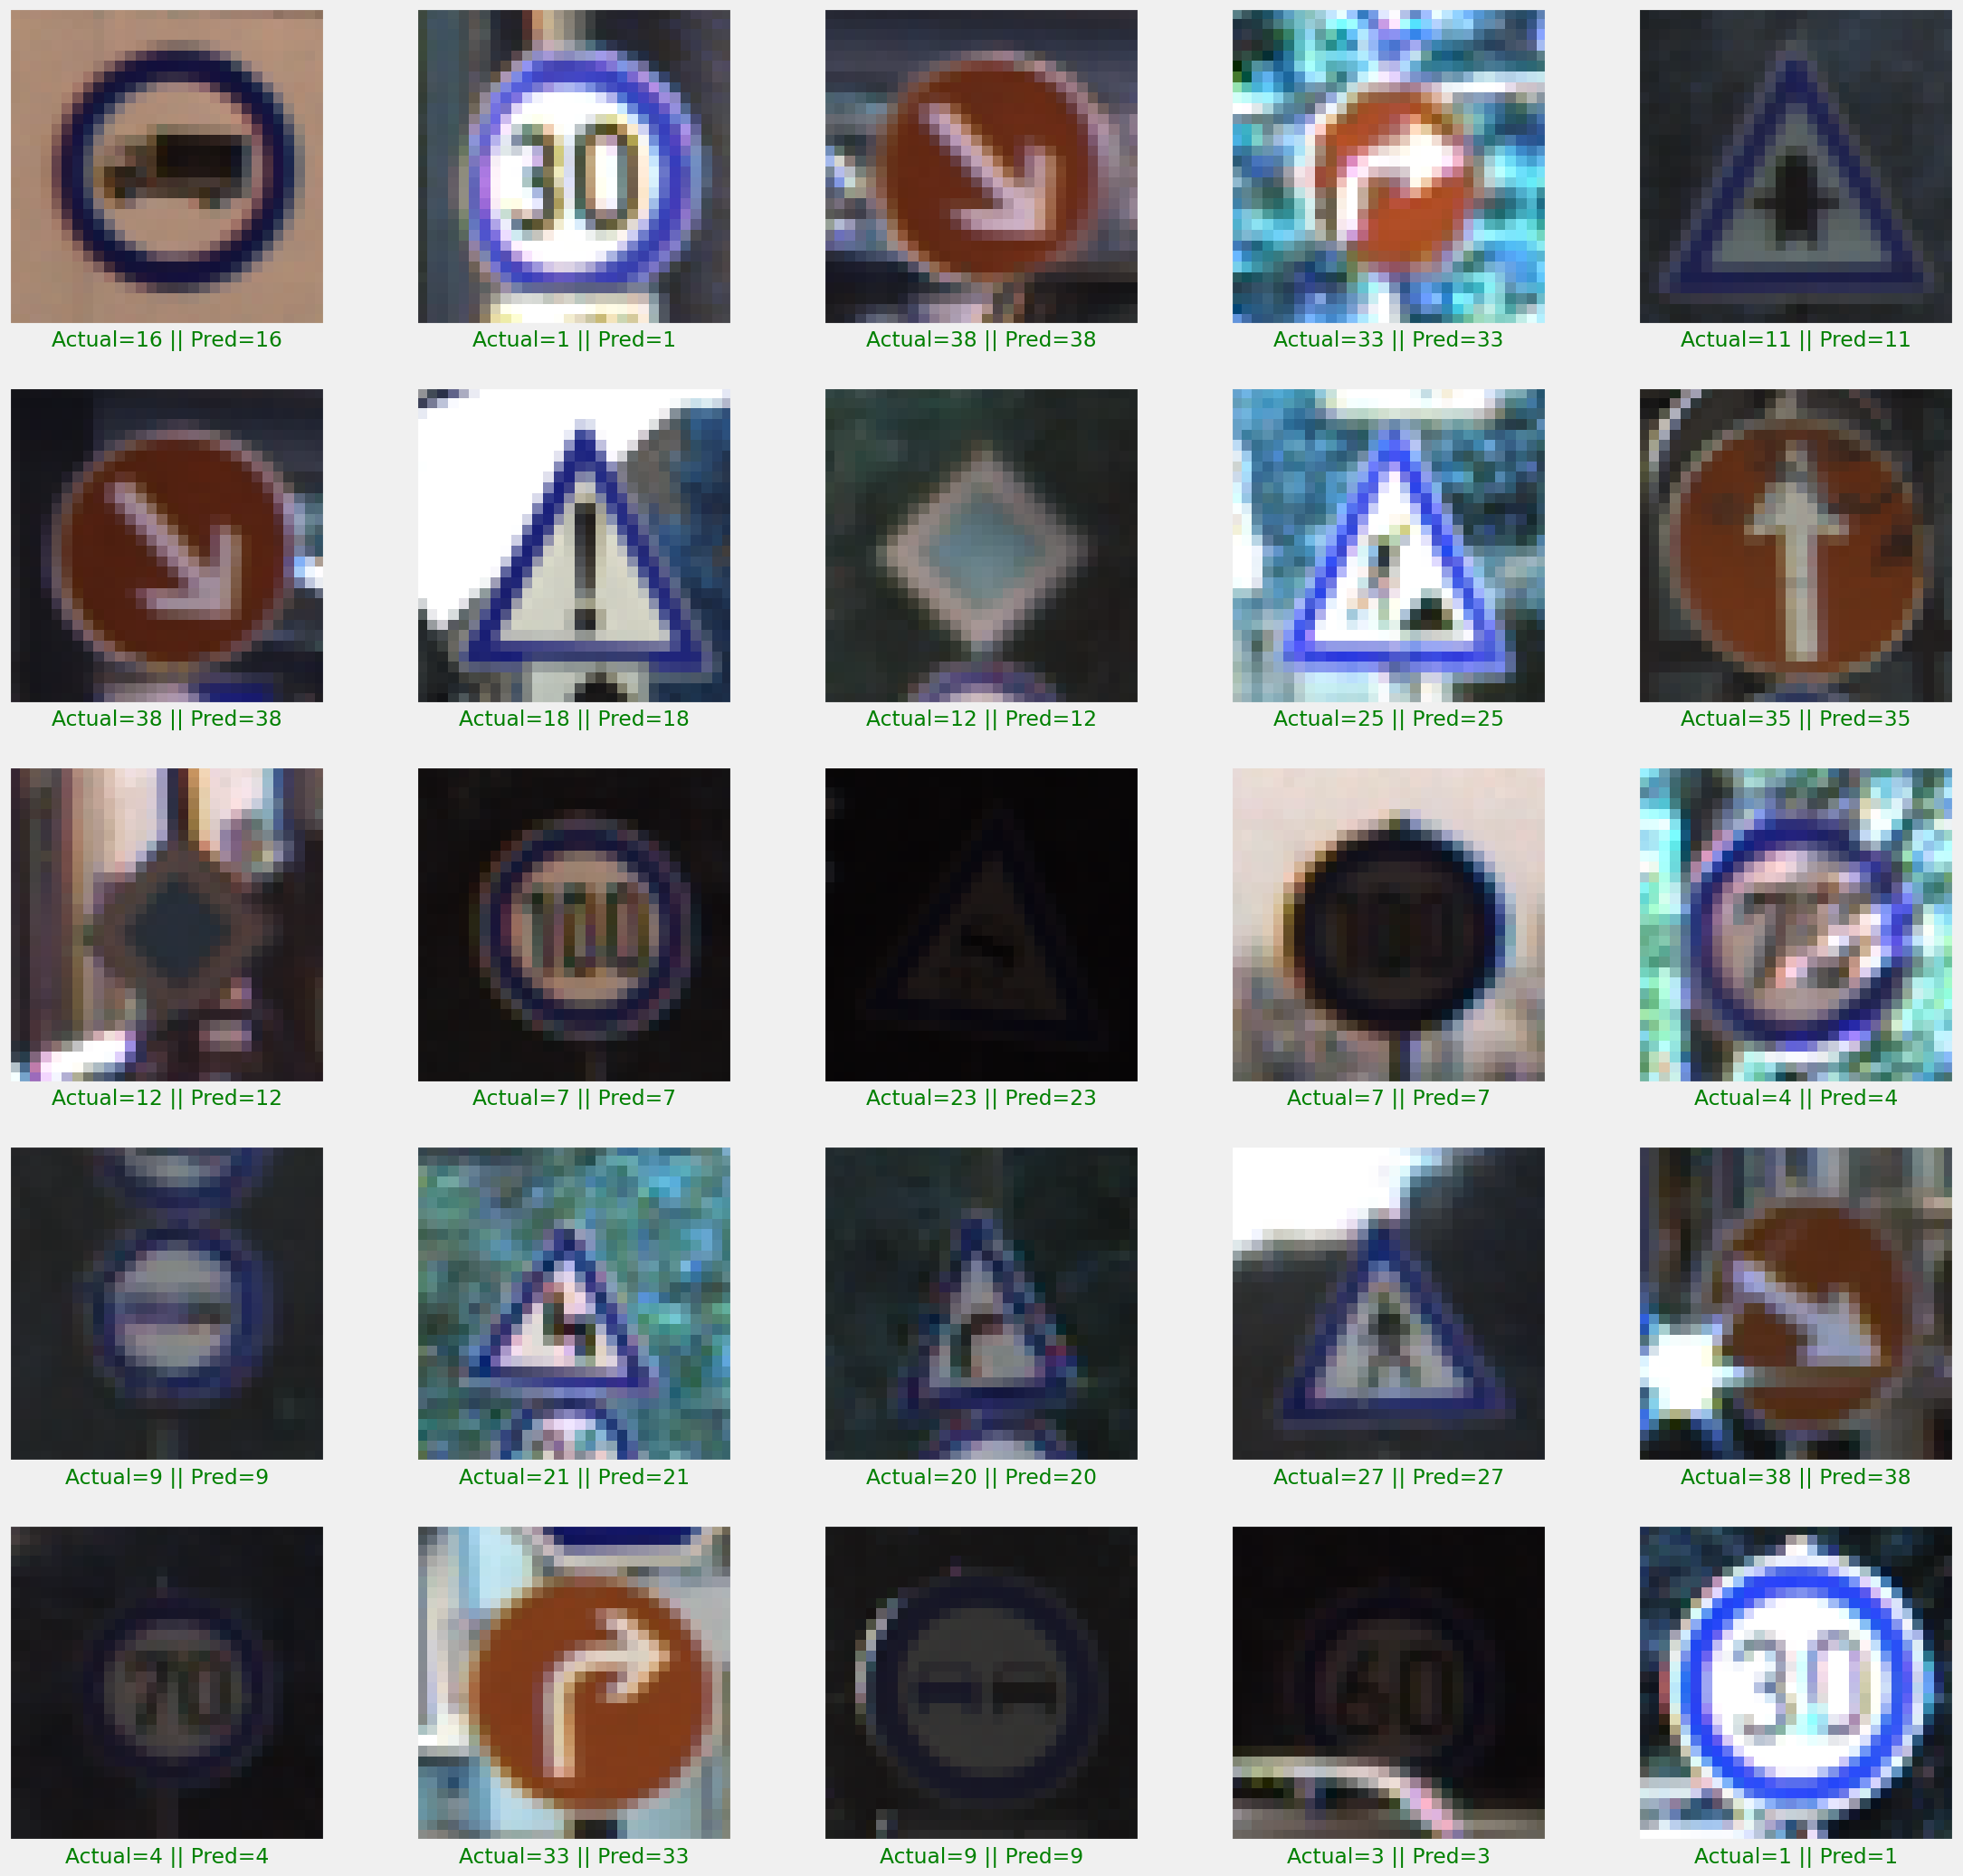

In [ ]:
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

In [ ]:
ls

drive/  model.h5  sample_data/


In [ ]:
print("/content/drive/MyDrive/Colab Notebooks/traffic images/output.data-00000-of-00001")


/content/drive/MyDrive/Colab Notebooks/traffic images/output.data-00000-of-00001


In [ ]:
import tensorflow as tf
import cv2
from PIL import Image
import numpy as np

# Load the model
model_path = "/content/drive/MyDrive/Colab Notebooks/traffic images/model.h5"
loaded_model = tf.keras.models.load_model(model_path)

# Load and preprocess the image
image = cv2.imread("photo.jpg")
image_fromarray = Image.fromarray(image, 'RGB')
resize_image = image_fromarray.resize((30, 30))
input_data = np.expand_dims(np.array(resize_image), axis=0) / 255.0

# Replace with the actual class labels from your dataset
sign_names = ['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)',
              'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)', 'Speed limit (120km/h)', 'No passing',
              'No passing veh over 3.5 tons', 'Right-of-way at intersection', 'Priority road', 'Yield', 'Stop',
              'No vehicles', 'Veh > 3.5 tons prohibited', 'No entry', 'General caution', 'Dangerous curve left',
              'Dangerous curve right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right',
              'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing',
              'Beware of ice/snow', 'Wild animals crossing', 'End speed + passing limits', 'Turn right ahead',
              'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left',
              'Roundabout mandatory', 'End of no passing', 'End no passing veh > 3.5 tons']

# Make a prediction
pred = loaded_model.predict(input_data)
predicted_class = np.argmax(pred)
prediction_accuracy = np.max(pred)

# Get the name of the predicted sign
predicted_sign = sign_names[predicted_class]

# Print the predicted sign and its accuracy
print(f"Predicted Sign: {predicted_sign}")
print(f"Prediction Accuracy: {prediction_accuracy:.2f}")


1/1 [==============================] - 0s 176ms/step
Predicted Sign: General caution
Prediction Accuracy: 0.29


In [ ]:
!pip install opencv-python-headless
!pip install tensorflow


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from PIL import Image
import io

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Capture';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Resize the output to fit the video element.
        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        // Wait for Capture to be clicked.
        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getVideoTracks()[0].stop();
        div.remove();
        return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

try:
    filename = take_photo()
    print('Saved to {}'.format(filename))

    # Display the captured image
    display(Image(filename))
except Exception as e:
    print(str(e))


<IPython.core.display.Javascript object>

Saved to photo.jpg
'module' object is not callable


1/1 [==============================] - 0s 107ms/step


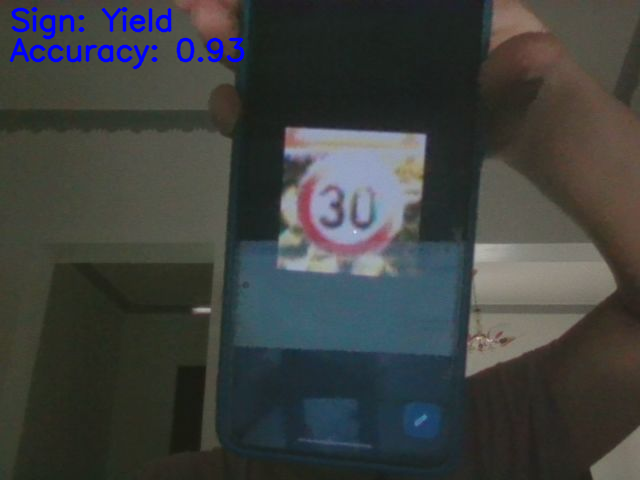

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from google.colab.patches import cv2_imshow

# Load the trained model for traffic sign detection
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/traffic images/model.h5')

# Function to preprocess the frame
def preprocess_frame(frame):
    # Resize frame to match the input size of the model (e.g., 30x30 if that's what your model expects)
    input_size = (30, 30)  # Replace with your model's input size
    frame_resized = cv2.resize(frame, input_size)
    # Normalize the image
    frame_normalized = frame_resized / 255.0
    # Expand dimensions to match model input
    frame_expanded = np.expand_dims(frame_normalized, axis=0)
    return frame_expanded

# Replace with the actual class labels from your dataset
# Example labels for GTSRB dataset (update these labels to match your dataset)
sign_names = ['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)',
              'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)', 'Speed limit (120km/h)', 'No passing',
              'No passing veh over 3.5 tons', 'Right-of-way at intersection', 'Priority road', 'Yield', 'Stop',
              'No vehicles', 'Veh > 3.5 tons prohibited', 'No entry', 'General caution', 'Dangerous curve left',
              'Dangerous curve right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right',
              'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing',
              'Beware of ice/snow', 'Wild animals crossing', 'End speed + passing limits', 'Turn right ahead',
              'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left',
              'Roundabout mandatory', 'End of no passing', 'End no passing veh > 3.5 tons']

# Read the captured photo
frame = cv2.imread(filename)

# Preprocess the frame
preprocessed_frame = preprocess_frame(frame)

# Predict using the model
predictions = model.predict(preprocessed_frame)
predicted_class = np.argmax(predictions)
prediction_accuracy = np.max(predictions)

# Get the name of the predicted sign
predicted_sign = sign_names[predicted_class]

# Display the results on the frame
cv2.putText(frame, f'Sign: {predicted_sign}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
cv2.putText(frame, f'Accuracy: {prediction_accuracy:.2f}', (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

# Show the frame with the detected sign
cv2_imshow(frame)


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image

# Load the saved model
model = load_model("/content/drive/MyDrive/Colab Notebooks/traffic images/model.h5")

# Define the class names
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }

In [ ]:
# Initialize the camera
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    if not ret:
        break

    # Preprocess the image
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image = Image.fromarray(image)
    image = image.resize((30, 30))
    image = np.array(image)
    image = image / 255.0  # Normalize the image
    image = np.expand_dims(image, axis=0)  # Add batch dimension

    # Make predictions
    predictions = model.predict(image)
    class_index = np.argmax(predictions)
    class_name = classes[class_index]
    confidence = np.max(predictions)

    # Display the resulting frame
    cv2.putText(frame, f"{class_name} ({confidence:.2f})", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    cv2.imshow('Traffic Sign Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 1s 627ms/step
Predicted class: Speed limit (30km/h) with confidence: 0.88


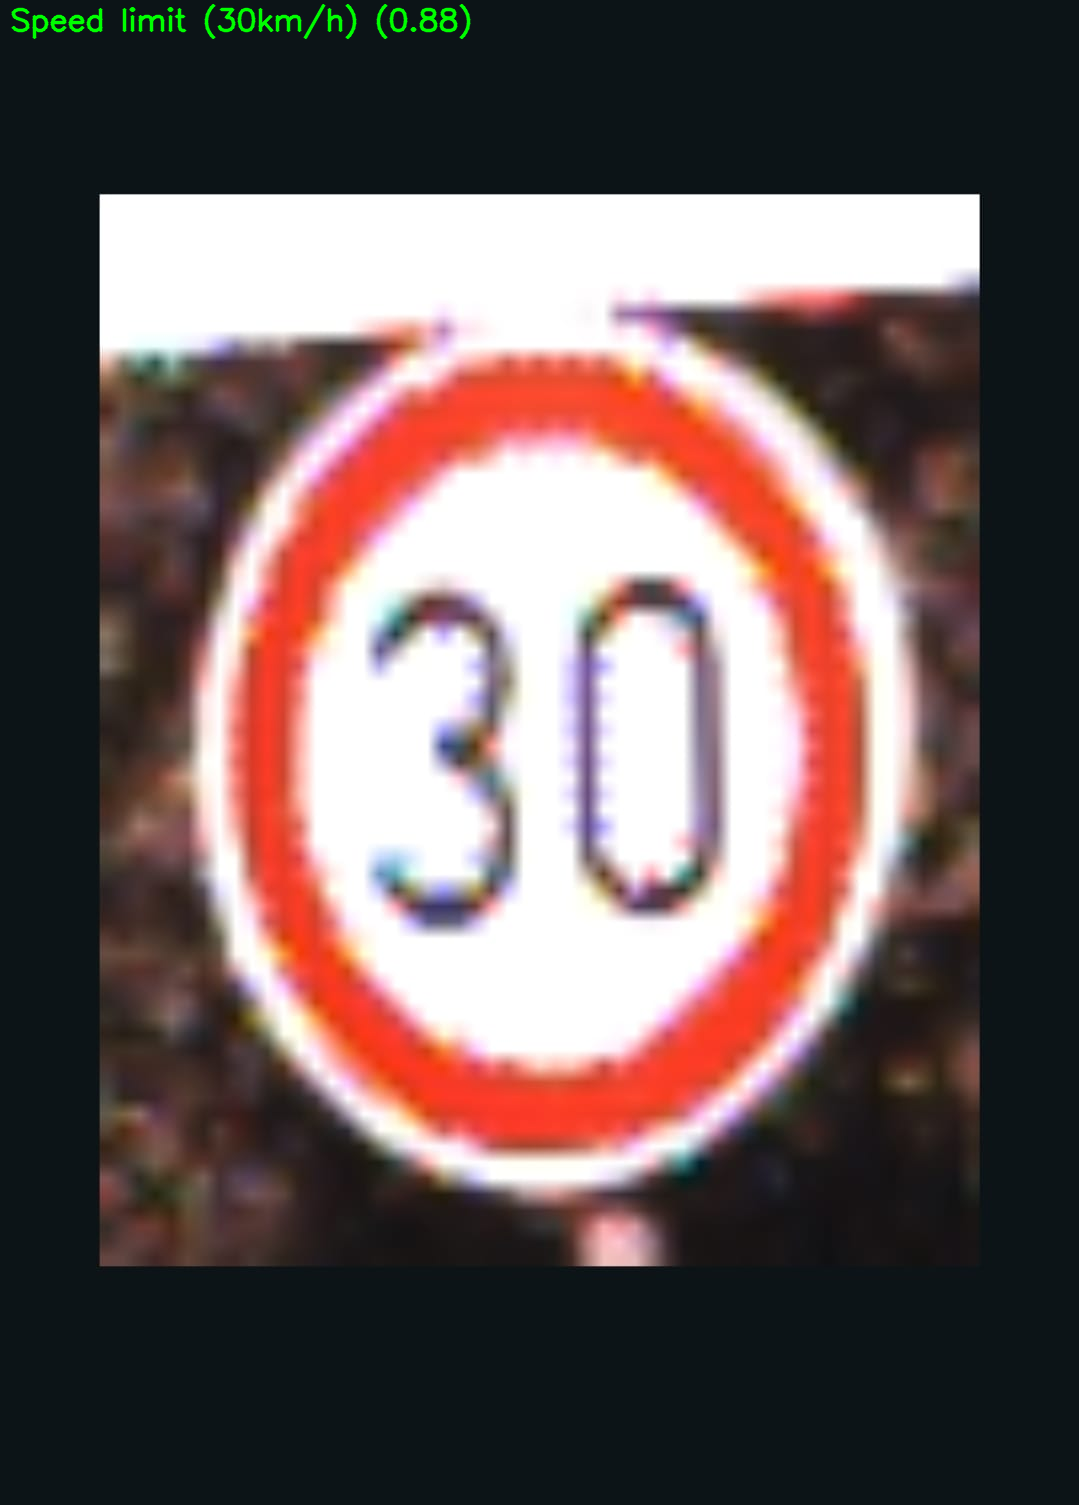

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image
from google.colab.patches import cv2_imshow

# Load the saved model
model = load_model("/content/drive/MyDrive/Colab Notebooks/traffic images/model.h5")

# Define the class names
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }

# Read the uploaded image
image_path = '/content/drive/MyDrive/Colab Notebooks/traffic images/speed30.jpeg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Preprocess the image
image_pil = Image.fromarray(image_rgb)
image_resized = image_pil.resize((30, 30))
image_array = np.array(image_resized)
image_normalized = image_array / 255.0  # Normalize the image
image_input = np.expand_dims(image_normalized, axis=0)  # Add batch dimension

# Make predictions
predictions = model.predict(image_input)
class_index = np.argmax(predictions)
class_name = classes[class_index]
confidence = np.max(predictions)

# Display the result
print(f"Predicted class: {class_name} with confidence: {confidence:.2f}")

# Visualize the result using cv2_imshow
cv2.putText(image, f"{class_name} ({confidence:.2f})", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
cv2_imshow(image)